In [ ]:
N.sathwika 
AIE23119

In [3]:
import numpy as np

# a) Summation Unit
def summation_unit(inputs, weights):
    """Computes weighted sum of inputs + bias"""
    return np.dot(inputs, weights[1:]) + weights[0]

# b) Activation Functions
def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    return np.tanh(x)

def relu_activation(x):
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x

# c) Error Comparator Unit
def calculate_error(y_true, y_pred):
    """Calculates squared error"""
    return 0.5 * (y_true - y_pred) ** 2

# Example inputs
inputs = np.array([1, 0])           # Inputs A=1, B=0
weights = np.array([10, 0.2, -0.75])  # W0=10 (bias), W1=0.2, W2=-0.75

# 1. Summation Unit Output
net_input = summation_unit(inputs, weights)
print(f"Summation Output: {net_input:.3f}")

# 2. Activation Outputs
print("Step Activation Output:", step_activation(net_input))
print("Bipolar Step Output:", bipolar_step_activation(net_input))
print(f"Sigmoid Activation Output: {sigmoid_activation(net_input):.3f}")
print(f"Tanh Activation Output: {tanh_activation(net_input):.3f}")
print(f"ReLU Activation Output: {relu_activation(net_input):.3f}")
print(f"Leaky ReLU Activation Output: {leaky_relu_activation(net_input):.3f}")

# 3. Error Comparator Example
target = 1
pred = step_activation(net_input)
error = calculate_error(target, pred)
print(f"Error: {error:.3f}")



Summation Output: 10.200
Step Activation Output: 1
Bipolar Step Output: 1
Sigmoid Activation Output: 1.000
Tanh Activation Output: 1.000
ReLU Activation Output: 10.200
Leaky ReLU Activation Output: 10.200
Error: 0.000


Trained Weights: [-0.1   0.1   0.05]
Total Epochs to Converge: 130


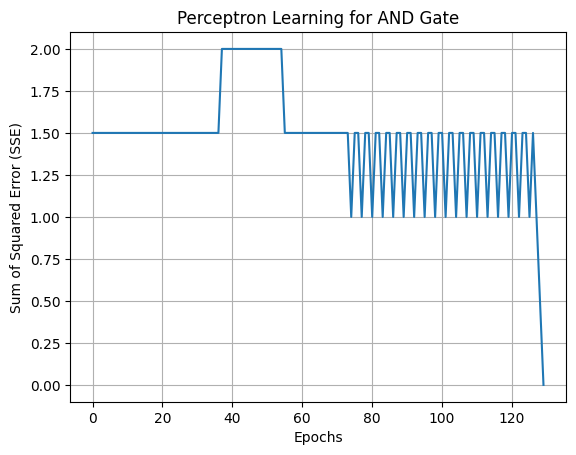

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# AND Gate Dataset
AND_inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
AND_targets = np.array([0, 0, 0, 1])

# Step activation function (reused from A1)
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron training function
def train_perceptron_AND(inputs, targets, weights, learning_rate=0.05, max_epochs=1000, threshold=0.002):
    epoch_errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for x, y_true in zip(inputs, targets):
            x_with_bias = np.insert(x, 0, 1)  # Add bias input
            net_input = np.dot(weights, x_with_bias)
            y_pred = step_activation(net_input)
            error = y_true - y_pred
            weights += learning_rate * error * x_with_bias
            total_error += 0.5 * error ** 2
        epoch_errors.append(total_error)
        if total_error <= threshold:
            break
    return weights, epoch_errors, epoch + 1

# Main execution for A2
initial_weights = np.array([10.0, 0.2, -0.75])
trained_weights, errors, total_epochs = train_perceptron_AND(
    inputs=AND_inputs,
    targets=AND_targets,
    weights=initial_weights.copy(),
    learning_rate=0.05
)

# Results
print("Trained Weights:", trained_weights)
print("Total Epochs to Converge:", total_epochs)

# Plotting epochs vs error
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Perceptron Learning for AND Gate')
plt.grid(True)
plt.show()


In [7]:
# Perceptron training function
def train_perceptron(inputs, targets, activation_func, weights, learning_rate=0.05, max_epochs=1000, threshold=0.002):
    import numpy as np
    epoch_errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for x, y_true in zip(inputs, targets):
            x_with_bias = np.insert(x, 0, 1)
            net = np.dot(x, weights[1:]) + weights[0]
            y_pred = activation_func(net)
            error = y_true - y_pred
            weights += learning_rate * error * x_with_bias
            total_error += 0.5 * (y_true - y_pred) ** 2
        epoch_errors.append(total_error)
        if total_error <= threshold:
            break
    return weights, epoch_errors, epoch + 1

activations = {
    "Bipolar Step": bipolar_step_activation,
    "Sigmoid": sigmoid_activation,
    "ReLU": relu_activation
}

print("A3 – Activation Function Comparison")
for name, act_func in activations.items():
    weights, errors, epochs = train_perceptron(
        AND_inputs, AND_targets, act_func, initial_weights.copy()
    )
    print(f"{name} - Epochs to converge: {epochs}")


A3 – Activation Function Comparison
Bipolar Step - Epochs to converge: 1000
Sigmoid - Epochs to converge: 1000
ReLU - Epochs to converge: 353


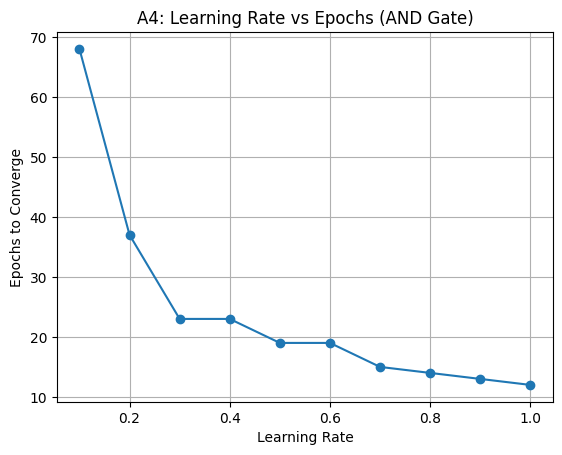

In [8]:
learning_rates = [0.1 * i for i in range(1, 11)]
epochs_vs_lr = []

for lr in learning_rates:
    _, _, epochs = train_perceptron(
        AND_inputs, AND_targets, step_activation, initial_weights.copy(), learning_rate=lr
    )
    epochs_vs_lr.append(epochs)

# Plot
plt.plot(learning_rates, epochs_vs_lr, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Epochs to Converge")
plt.title("A4: Learning Rate vs Epochs (AND Gate)")
plt.grid(True)
plt.show()


A5 – XOR Gate (Step Activation)
Final Weights: [ 0.1 -0.1 -0.1]
Epochs: 1000


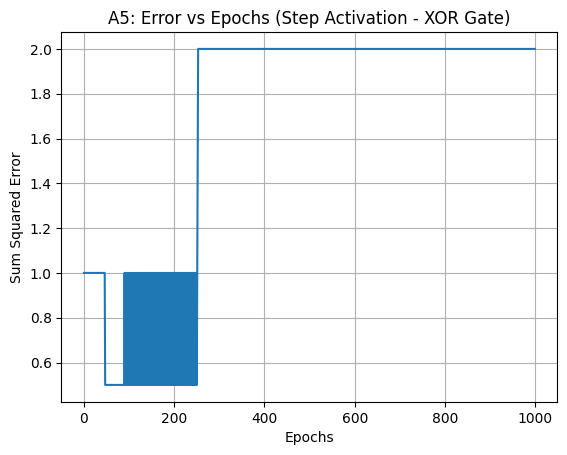

In [9]:
# XOR Gate Dataset
XOR_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
XOR_targets = np.array([0, 1, 1, 0])

# Try with step (not expected to converge fully with single-layer perceptron)
trained_weights_xor, errors_xor, epochs_xor = train_perceptron(
    XOR_inputs, XOR_targets, step_activation, initial_weights.copy()
)

print("A5 – XOR Gate (Step Activation)")
print("Final Weights:", trained_weights_xor)
print("Epochs:", epochs_xor)

# Plot
plt.plot(errors_xor)
plt.xlabel("Epochs")
plt.ylabel("Sum Squared Error")
plt.title("A5: Error vs Epochs (Step Activation - XOR Gate)")
plt.grid(True)
plt.show()


In [10]:
import numpy as np

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for weight update
def sigmoid_derivative(x):
    return x * (1 - x)

# Error comparator
def compute_error(y_true, y_pred):
    return 0.5 * np.sum((y_true - y_pred) ** 2)

# Perceptron Training
def train_perceptron_sigmoid(X, y, learning_rate=0.1, max_epochs=1000, error_threshold=0.002):
    # Initialize weights and bias
    np.random.seed(42)
    weights = np.random.randn(X.shape[1])
    bias = np.random.randn()
    error_list = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            input_vector = X[i]
            target = y[i]

            z = np.dot(input_vector, weights) + bias
            prediction = sigmoid(z)
            error = target - prediction

            # Weight update
            weights += learning_rate * error * sigmoid_derivative(prediction) * input_vector
            bias += learning_rate * error * sigmoid_derivative(prediction)

            total_error += compute_error(target, prediction)
        
        error_list.append(total_error)
        if total_error <= error_threshold:
            break

    return weights, bias, epoch+1, error_list

# Main section
if __name__ == "__main__":
    # Customer data
    X = np.array([
        [20, 6, 2, 386],
        [16, 3, 6, 289],
        [27, 6, 2, 393],
        [19, 1, 2, 110],
        [24, 4, 2, 280],
        [22, 1, 5, 167],
        [15, 4, 2, 271],
        [18, 4, 2, 274],
        [21, 1, 4, 148],
        [16, 2, 4, 198]
    ])

    y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # 1 = High Value, 0 = Low Value

    weights, bias, epochs, error_list = train_perceptron_sigmoid(X, y)

    print("Trained weights:", weights)
    print("Bias:", bias)
    print("Epochs to converge:", epochs)


Trained weights: [ 0.49671415 -0.1382643   0.64768854  1.52302986]
Bias: -0.23415337472333597
Epochs to converge: 1000


In [11]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pseudo-inverse based solution
def pseudo_inverse_method(X, y):
    # Add bias column (ones)
    X_aug = np.hstack([X, np.ones((X.shape[0], 1))])

    # Calculate weights using Moore-Penrose pseudo-inverse
    pseudo_inv = np.linalg.pinv(X_aug)
    weights = np.dot(pseudo_inv, y)

    return weights

# Predict using weights from pseudo-inverse
def predict_pseudo_inverse(X, weights):
    # Add bias column
    X_aug = np.hstack([X, np.ones((X.shape[0], 1))])
    outputs = sigmoid(np.dot(X_aug, weights))
    predictions = np.round(outputs)  # Round to 0 or 1
    return predictions

# Main section
if __name__ == "__main__":
    X = np.array([
        [20, 6, 2, 386],
        [16, 3, 6, 289],
        [27, 6, 2, 393],
        [19, 1, 2, 110],
        [24, 4, 2, 280],
        [22, 1, 5, 167],
        [15, 4, 2, 271],
        [18, 4, 2, 274],
        [21, 1, 4, 148],
        [16, 2, 4, 198]
    ])

    y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

    weights = pseudo_inverse_method(X, y)
    predictions = predict_pseudo_inverse(X, weights)

    print("Pseudo-inverse weights:", weights)
    print("Predictions:", predictions)
    print("Ground Truth:", y)
    accuracy = np.mean(predictions == y) * 100
    print(f"Accuracy: {accuracy:.2f}%")


Pseudo-inverse weights: [-0.02789923  0.01473739 -0.04323249  0.00447248  0.1139903 ]
Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ground Truth: [1 1 1 0 1 0 1 1 0 0]
Accuracy: 60.00%


In [12]:
import numpy as np

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Error function
def compute_total_error(y_true, y_pred):
    return 0.5 * np.sum((y_true - y_pred) ** 2)

# Backpropagation training for 2-layer neural network
def train_nn_backprop(X, y, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    np.random.seed(42)

    # Network structure: 2 input -> 2 hidden -> 1 output
    input_dim = X.shape[1]
    hidden_dim = 2
    output_dim = 1

    # Initialize weights and biases
    W1 = np.random.randn(input_dim, hidden_dim)
    b1 = np.random.randn(hidden_dim)
    W2 = np.random.randn(hidden_dim, output_dim)
    b2 = np.random.randn(output_dim)

    error_list = []

    for epoch in range(max_epochs):
        total_error = 0

        for i in range(len(X)):
            # Forward pass
            x = X[i]
            target = y[i]

            z1 = np.dot(x, W1) + b1
            a1 = sigmoid(z1)

            z2 = np.dot(a1, W2) + b2
            a2 = sigmoid(z2)

            # Error
            error = target - a2
            total_error += compute_total_error(target, a2)

            # Backward pass
            delta2 = error * sigmoid_derivative(a2)
            delta1 = delta2.dot(W2.T) * sigmoid_derivative(a1)

            # Update weights and biases
            W2 += learning_rate * np.outer(a1, delta2)
            b2 += learning_rate * delta2

            W1 += learning_rate * np.outer(x, delta1)
            b1 += learning_rate * delta1

        error_list.append(total_error)
        if total_error <= error_threshold:
            break

    return W1, b1, W2, b2, epoch + 1, error_list

# Main section
if __name__ == "__main__":
    # AND Gate inputs and outputs
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])

    y = np.array([0, 0, 0, 1])

    W1, b1, W2, b2, epochs, error_list = train_nn_backprop(X, y)

    print("Trained W1:", W1)
    print("Trained b1:", b1)
    print("Trained W2:", W2)
    print("Trained b2:", b2)
    print("Epochs to converge:", epochs)


Trained W1: [[1.45968893 0.17870311]
 [1.24732808 1.84739763]]
Trained b1: [-1.49436483 -0.65138416]
Trained W2: [[2.35253605]
 [1.0458362 ]]
Trained b2: [-2.56364802]
Epochs to converge: 1000


In [13]:
import numpy as np

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Error comparator
def compute_error(y_true, y_pred):
    return 0.5 * (y_true - y_pred) ** 2

# XOR perceptron with Step activation
def train_xor_step_perceptron(X, y, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    # Initial weights: w0 (bias), w1, w2
    weights = np.array([10.0, 0.2, -0.75])
    error_list = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            x1, x2 = X[i]
            z = weights[0] + weights[1]*x1 + weights[2]*x2
            prediction = step_activation(z)
            error = y[i] - prediction

            # Weight updates
            weights[0] += learning_rate * error  # bias update
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2

            total_error += compute_error(y[i], prediction)

        error_list.append(total_error)
        if total_error <= error_threshold:
            break

    return weights, epoch+1, error_list

# Main
if __name__ == "__main__":
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    y = np.array([0, 1, 1, 0])

    weights, epochs, errors = train_xor_step_perceptron(X, y)

    print("Final weights:", weights)
    print("Epochs to converge:", epochs)


Final weights: [ 0.1 -0.1 -0.1]
Epochs to converge: 1000


In [14]:
def step_activation(x):
    return 1 if x >= 0 else 0

def compute_error(y_true, y_pred):
    return 0.5 * (y_true - y_pred) ** 2

# Two-output perceptron model
def train_two_output_perceptron(X, y, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    # Initialize weights for both outputs: w0, w1, w2 for each
    weights1 = np.array([10.0, 0.2, -0.75])  # for output1
    weights2 = np.array([10.0, 0.2, -0.75])  # for output2
    error_list = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            x1, x2 = X[i]
            target1, target2 = y[i]

            # Output 1
            z1 = weights1[0] + weights1[1]*x1 + weights1[2]*x2
            pred1 = step_activation(z1)
            err1 = target1 - pred1

            weights1[0] += learning_rate * err1
            weights1[1] += learning_rate * err1 * x1
            weights1[2] += learning_rate * err1 * x2

            # Output 2
            z2 = weights2[0] + weights2[1]*x1 + weights2[2]*x2
            pred2 = step_activation(z2)
            err2 = target2 - pred2

            weights2[0] += learning_rate * err2
            weights2[1] += learning_rate * err2 * x1
            weights2[2] += learning_rate * err2 * x2

            total_error += compute_error(target1, pred1) + compute_error(target2, pred2)

        error_list.append(total_error)
        if total_error <= error_threshold:
            break

    return weights1, weights2, epoch+1, error_list

# Main
if __name__ == "__main__":
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])

    # Two output representation of XOR
    y = np.array([
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0]
    ])

    w1, w2, epochs, errors = train_two_output_perceptron(X, y)

    print("Final weights for output node 1:", w1)
    print("Final weights for output node 2:", w2)
    print("Epochs to converge:", epochs)


Final weights for output node 1: [-7.64666108e-15  5.00000000e-02  3.19189120e-16]
Final weights for output node 2: [ 0.1 -0.1 -0.1]
Epochs to converge: 1000


In [15]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Gate datasets
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_xor = np.array([0, 1, 1, 0])

def train_mlp(X, y, gate_name):
    clf = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd',
                        learning_rate_init=0.05, max_iter=1000, random_state=42)
    clf.fit(X, y)
    acc = clf.score(X, y)
    print(f"{gate_name} Gate MLPClassifier Results:")
    print("Predictions:", clf.predict(X))
    print("Accuracy:", acc * 100, "%\n")
    return clf

# Train on AND gate
mlp_and = train_mlp(X, y_and, "AND")

# Train on XOR gate
mlp_xor = train_mlp(X, y_xor, "XOR")


AND Gate MLPClassifier Results:
Predictions: [0 0 0 1]
Accuracy: 100.0 %

XOR Gate MLPClassifier Results:
Predictions: [0 0 1 0]
Accuracy: 75.0 %



In [16]:
# Customer dataset
X_proj = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])
y_proj = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# MLPClassifier for project
mlp_proj = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='sgd',
                         learning_rate_init=0.05, max_iter=1000, random_state=42)
mlp_proj.fit(X_proj, y_proj)
predictions = mlp_proj.predict(X_proj)
acc_proj = mlp_proj.score(X_proj, y_proj)

print("Project Data Classification with MLPClassifier:")
print("Predictions:", predictions)
print("Ground Truth:", y_proj)
print("Accuracy:", acc_proj * 100, "%")


Project Data Classification with MLPClassifier:
Predictions: [1 1 1 1 1 1 1 1 1 1]
Ground Truth: [1 1 1 0 1 0 1 1 0 0]
Accuracy: 60.0 %
